In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

2023-10-16 11:00:19.476371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(xtrain, ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [6]:
xtrain=xtrain/255
xtest=xtest/255

4


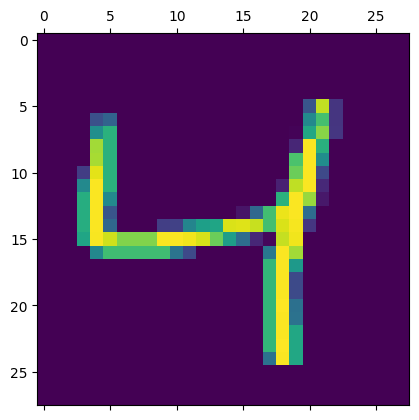

In [7]:
plt.matshow(xtrain[2])
print(ytrain[2])

In [4]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'), 
]) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [5]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.0778 - accuracy: 0.9771


[0.07783858478069305, 0.9771000146865845]

In [72]:
ypredicted=model.predict(xtest)
ypredicted_label=[np.argmax(i) for i in ypredicted]

313/313 [==============================] - 0s 1ms/step


In [79]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypredicted_label)

Text(95.72222222222221, 0.5, 'Truth')

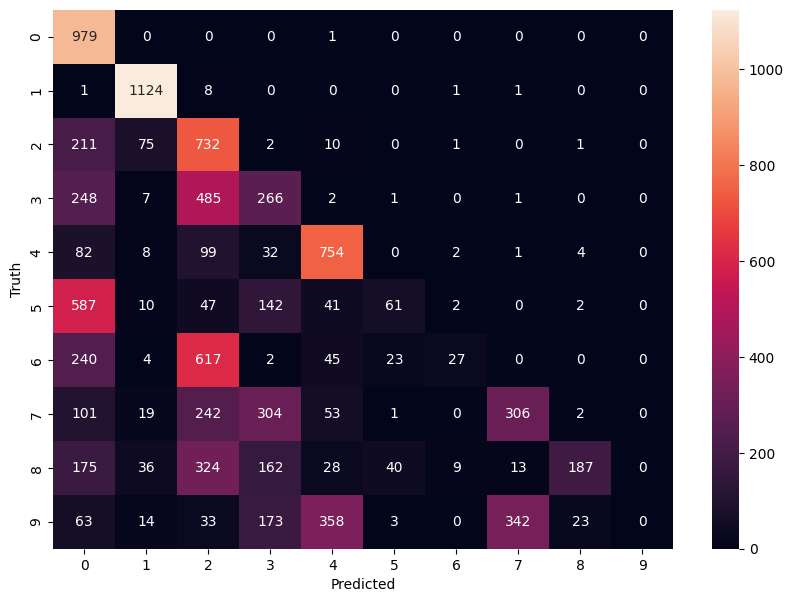

In [82]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
#using TensorBoard to fit the hyper parameters

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'), #activation='softmax' in which sum of P=1
]) 


tf_callback=tf.keras.callbacks.TensorBoard(log_dir="TensorBoard/adam",histogram_freq=10)


model.compile(optimizer='adam', # SGD: stochastic Gradient decent 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# categorical_crossentropy [000100000] vs sparse_categorical_crossentropy [3] 
               

model.fit(xtrain, ytrain, epochs=10, callbacks=[tf_callback]) # batch_size=15 for mini batch_GD 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1255 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [ ]:
%load_ext tensorboard 
%tensorboard --logdir TensorBoard/

#use Dropout layer to check for overfitting of model by randomly drop 0.5 of neruns

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='sigmoid'), 
]) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4287 - accuracy: 0.8730
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9262
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2080 - accuracy: 0.9366
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1870 - accuracy: 0.9437
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.9485
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9509
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1541 - accuracy: 0.9529
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1483 - accuracy: 0.9539
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9553
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.137

In [9]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9734


[0.08971510827541351, 0.9733999967575073]

In [14]:
#using tensorflow GPU

In [10]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
tf.__version__

'2.14.0'

In [12]:
tf.test.is_built_with_cuda()

False

In [13]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='sigmoid'), 
]) 

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

    model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4262 - accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9269
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2096 - accuracy: 0.9382
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1915 - accuracy: 0.9431
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1765 - accuracy: 0.9462
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1649 - accuracy: 0.9491
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1540 - accuracy: 0.9535
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1508 - accuracy: 0.9543
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1467 - accuracy: 0.9545
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.136